In [133]:
#Load the Datasets:
import pandas as pd
sales_data = pd.read_csv('Retail_Transaction_Dataset.csv')
holiday_data = pd.read_csv('HolidayData.csv')


In [134]:
#Preview the Data:
print(sales_data.head())
print(holiday_data.head())


   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677100   455.862764  
1           

In [135]:
#Check Data Types :
print(sales_data.dtypes)
print(holiday_data.dtypes)


CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object
Date           object
HolidayName    object
Country        object
dtype: object


In [136]:
# Checking for missing values:
print(sales_data.isnull().sum())
print(holiday_data.isnull().sum())


CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64
Date           0
HolidayName    0
Country        0
dtype: int64


In [137]:
#Check for Duplicate values
print(sales_data.duplicated().sum())
print(holiday_data.duplicated().sum())


0
0


In [138]:
#Convert TransactionDate and Date to datetime format 
sales_data['TransactionDate'] = pd.to_datetime(sales_data['TransactionDate'])
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])


In [139]:
sales_data['TransactionDate'] = sales_data['TransactionDate'].dt.date

In [140]:
#reconverting transactiondate to datetime
sales_data['TransactionDate'] = pd.to_datetime(sales_data['TransactionDate'])

In [141]:
print(holiday_data.head())


        Date                 HolidayName        Country
0 2023-01-01              New Year's Day  United States
1 2023-01-16  Martin Luther King Jr. Day  United States
2 2023-02-14             Valentine's Day  United States
3 2023-02-20             Presidents' Day  United States
4 2023-04-09               Easter Sunday  United States


In [142]:
#converting into category so that memory is optimized
sales_data['ProductCategory'] = sales_data['ProductCategory'].astype('category')
sales_data['PaymentMethod'] = sales_data['PaymentMethod'].astype('category')


In [143]:
#checking for anomolies or outliers
print(sales_data[['Price', 'DiscountApplied(%)', 'TotalAmount']].describe())


               Price  DiscountApplied(%)    TotalAmount
count  100000.000000       100000.000000  100000.000000
mean       55.067344           10.020155     248.334955
std        25.971567            5.779534     184.554792
min        10.000430            0.000046       8.274825
25%        32.549474            5.001013      95.163418
50%        55.116789           10.030353     200.368393
75%        77.456763           15.018367     362.009980
max        99.999284           19.999585     896.141242


In [144]:
#using ~np.isclose to make sure that values are treated same even if there is a very small difference between them
import numpy as np
sales_data['CalculatedAmount'] = (sales_data['Price'] * sales_data['Quantity'] * (1 - sales_data['DiscountApplied(%)'] / 100))
discrepancies =sales_data[~np.isclose(sales_data['CalculatedAmount'],sales_data['TotalAmount'])]


In [145]:
print(discrepancies)

Empty DataFrame
Columns: [CustomerID, ProductID, Quantity, Price, TransactionDate, PaymentMethod, StoreLocation, ProductCategory, DiscountApplied(%), TotalAmount, CalculatedAmount]
Index: []


In [146]:
# Merge sales data with holiday data on the date columns
merged_data = pd.merge(
    sales_data, 
    holiday_data, 
    left_on='TransactionDate',  # Column in sales data
    right_on='Date',            # Column in holiday data
    how='left'                  # Keep all sales data rows
)

# Preview the merged dataset
print(merged_data.head())


   CustomerID ProductID  Quantity      Price TransactionDate PaymentMethod  \
0      109318         C         7  80.079844      2023-12-26          Cash   
1      993229         C         4  75.195229      2023-08-05          Cash   
2      579675         A         8  31.528816      2024-03-11          Cash   
3      799826         D         5  98.880218      2023-10-27        PayPal   
4      121413         A         7  93.188512      2023-12-22          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  CalculatedAmount Date HolidayName Country  
0           18.677

In [147]:
# Fill missing values in the holiday-related columns
merged_data['HolidayName'].fillna('No Holiday', inplace=True)
merged_data['Country'].fillna('N/A', inplace=True)


In [148]:
# Add a column to indicate if the transaction occurred on a holiday
merged_data['IsHoliday'] = merged_data['HolidayName'] != 'No Holiday'


In [149]:
# Drop 'Date' and 'Country' columns
merged_data = merged_data.drop(columns=['Date', 'Country'])
# Drop the 'CalculatedAmount' column
merged_data = merged_data.drop(columns=['CalculatedAmount'])


# Verify the updated dataset
print(merged_data.head())


   CustomerID ProductID  Quantity      Price TransactionDate PaymentMethod  \
0      109318         C         7  80.079844      2023-12-26          Cash   
1      993229         C         4  75.195229      2023-08-05          Cash   
2      579675         A         8  31.528816      2024-03-11          Cash   
3      799826         D         5  98.880218      2023-10-27        PayPal   
4      121413         A         7  93.188512      2023-12-22          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount HolidayName  IsHoliday  
0           18.677100   455.862764  No

In [150]:
holiday_sales = merged_data[merged_data['IsHoliday'] == True]

# Display the rows
print(holiday_sales.head())

     CustomerID ProductID  Quantity      Price TransactionDate PaymentMethod  \
38       857878         C         2  53.870550      2024-01-15    Debit Card   
63       301389         A         5  55.542815      2024-03-31    Debit Card   
96       487175         D         8  73.559908      2024-02-14    Debit Card   
101      829031         D         5  94.275309      2023-06-19          Cash   
119      934277         A         6  29.428466      2023-07-04        PayPal   

                                         StoreLocation ProductCategory  \
38        265 Williams Passage\nNorth Andrew, GU 20893           Books   
63             15068 Regina Isle\nAriasshire, AZ 83493     Electronics   
96    98751 Isaac Court Apt. 812\nEast Tracy, IL 95098        Clothing   
101  2155 Hartman Turnpike Apt. 632\nCharlestown, M...     Electronics   
119  841 Jennifer Lodge Suite 593\nWest Amandabury,...        Clothing   

     DiscountApplied(%)  TotalAmount                           HolidayName

In [151]:
merged_data[['Price', 'TotalAmount']].boxplot()


<AxesSubplot:>

In [152]:
#Checking unsually high total amounts to see if they are outliers or real transactions
outliers = merged_data[merged_data['TotalAmount'] > merged_data['TotalAmount'].quantile(0.95)]
print(outliers)


       CustomerID ProductID  Quantity      Price TransactionDate  \
4          121413         A         7  93.188512      2023-12-22   
10         266491         C         8  98.792726      2023-09-25   
37           2398         C         9  80.186396      2024-04-20   
67         937640         C         9  84.956484      2023-10-06   
87         229231         B         9  82.275937      2023-06-14   
...           ...       ...       ...        ...             ...   
99876      859340         A         8  86.901088      2024-04-15   
99902      535160         B         9  83.466092      2023-11-24   
99918      190795         C         8  95.604436      2024-02-21   
99975      507259         A         9  98.097683      2023-11-18   
99988       38578         D         9  71.253131      2023-07-31   

      PaymentMethod                                      StoreLocation  \
4              Cash   0070 Michelle Island Suite 143\nHoland, VA 80142   
10       Debit Card  388 Matthew La

In [153]:
print(merged_data['StoreLocation'].unique())



['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218']


In [154]:
#Cleaning the StoreLocation column by removing line breaks
merged_data['StoreLocation'] = merged_data['StoreLocation'].str.replace('\n', ' ', regex=True)


In [155]:
# Remove line breaks for consistency
merged_data['StoreLocation'] = merged_data['StoreLocation'].str.replace('\n', ' ', regex=True).str.strip()

# Extract State and Pincode using regex
merged_data[['State', 'Pincode']] = merged_data['StoreLocation'].str.extract(r'([A-Z]{2})\s*(\d{5})')

# Verify the results
print(merged_data[['StoreLocation', 'State', 'Pincode']].head(20))


                                        StoreLocation State Pincode
0              176 Andrew Cliffs Baileyfort, HI 93354    HI   93354
1    11635 William Well Suite 809 East Kara, MT 19483    MT   19483
2   910 Mendez Ville Suite 909 Port Lauraland, MO ...    MO   99563
3   87522 Sharon Corners Suite 500 Lake Tammy, MO ...    MO   76234
4     0070 Michelle Island Suite 143 Holand, VA 80142    VA   80142
5     8492 Jonathan Drive North Robertshire, TN 67532    TN   67532
6                           USNV Harrell FPO AA 62814    AA   62814
7   489 Juan Loop Apt. 093 North Brettville, WV 72610    WV   72610
8   528 Justin Expressway Apt. 336 Cabreraborough,...    SD   17915
9                189 Wright Mews Martinfurt, MO 75932    MO   75932
10  388 Matthew Lane Apt. 592 West Andreachester, ...    IN   96537
11                    PSC 1498, Box 4142 APO AP 10928    AP   10928
12     623 William Track Apt. 920 Port Dave, NE 02045    NE   02045
13  5370 Nichols Fork Suite 983 Georgeshire, MT 

In [156]:
print(merged_data.head(20))


    CustomerID ProductID  Quantity      Price TransactionDate PaymentMethod  \
0       109318         C         7  80.079844      2023-12-26          Cash   
1       993229         C         4  75.195229      2023-08-05          Cash   
2       579675         A         8  31.528816      2024-03-11          Cash   
3       799826         D         5  98.880218      2023-10-27        PayPal   
4       121413         A         7  93.188512      2023-12-22          Cash   
5       463050         D         3  54.093152      2023-08-15          Cash   
6       888163         D         7  13.121937      2023-12-26        PayPal   
7       843385         A         8  56.025164      2023-10-11    Debit Card   
8       839609         B         5  23.857981      2024-02-27   Credit Card   
9       184135         D         4  63.342777      2023-11-05    Debit Card   
10      266491         C         8  98.792726      2023-09-25    Debit Card   
11       65632         D         8  78.123142      2

In [157]:
#Based on the new features we added seeing the total amount on holidays vs non holidays
total_holiday_sales = merged_data.groupby('IsHoliday')['TotalAmount'].sum()
print(total_holiday_sales)
#therefore in this dataset non holiday sales are more when comapre to holiday dataset

IsHoliday
False    2.383265e+07
True     1.000841e+06
Name: TotalAmount, dtype: float64


In [158]:
#Customer metrics
#Avg spend by the customer
customer_avg_spend = merged_data.groupby('CustomerID')['TotalAmount'].mean()
merged_data['AvgSpend'] = merged_data['CustomerID'].map(customer_avg_spend)
print(merged_data[['CustomerID', 'AvgSpend']].head())


   CustomerID    AvgSpend
0      109318  455.862764
1      993229  258.306546
2      579675  212.015651
3      799826  461.343769
4      121413  448.843328


In [159]:
#Total Transactions per customer
customer_transactions = merged_data.groupby('CustomerID')['TransactionDate'].count()
merged_data['TotalTransactions'] = merged_data['CustomerID'].map(customer_transactions)
print("Total Transactions per Customer:")
# Displaying the first 10 customers
print(customer_transactions.head(20))  



Total Transactions per Customer:
CustomerID
14     1
42     1
49     1
59     2
65     1
87     1
96     1
98     1
100    1
101    1
135    1
165    1
169    1
190    1
202    1
211    1
213    1
223    1
227    1
230    1
Name: TransactionDate, dtype: int64


In [160]:
#Repeat Customer
merged_data['IsRepeatCustomer'] = merged_data['TotalTransactions'] > 1
print(merged_data[['CustomerID', 'IsRepeatCustomer']].head())


   CustomerID  IsRepeatCustomer
0      109318             False
1      993229             False
2      579675             False
3      799826             False
4      121413              True


In [161]:
#All the storelocations are unique in this dataset.
#total revenue per store
store_revenue = merged_data.groupby('StoreLocation')['TotalAmount'].sum()
merged_data['StoreRevenue'] = merged_data['StoreLocation'].map(store_revenue)
print(store_revenue)


StoreLocation
000 Alexander Spurs Rothtown, IL 35945               185.324423
000 Allen Rue Kiddstad, MS 61368                      54.397195
000 Ashley Camp Suite 144 West Natasha, SC 03524      64.086878
000 Bennett Mountains Apt. 210 Levifort, ME 61462     68.490113
000 Carpenter Curve East Brett, AS 53903             146.991355
                                                        ...    
Unit 9983 Box 8478 DPO AA 68111                      156.727895
Unit 9986 Box 8172 DPO AP 21999                      126.594018
Unit 9989 Box 6060 DPO AE 61725                      228.191085
Unit 9998 Box 1568 DPO AA 59676                       90.974087
Unit 9999 Box 0761 DPO AE 02129                      341.164219
Name: TotalAmount, Length: 100000, dtype: float64


In [162]:
#Calculating total revenue based by category
category_performance = merged_data.groupby(['StoreLocation', 'ProductCategory'])['TotalAmount'].sum()
category_performance = category_performance.reset_index()
category_performance.rename(columns={'TotalAmount': 'CategoryPerformance'}, inplace=True)

# Merge the category performance back to the original DataFrame
merged_data = merged_data.merge(category_performance, on=['StoreLocation', 'ProductCategory'], how='left')

print(category_performance)


                                 StoreLocation ProductCategory  \
0       000 Alexander Spurs Rothtown, IL 35945           Books   
1       000 Alexander Spurs Rothtown, IL 35945        Clothing   
2       000 Alexander Spurs Rothtown, IL 35945     Electronics   
3       000 Alexander Spurs Rothtown, IL 35945      Home Decor   
4             000 Allen Rue Kiddstad, MS 61368           Books   
...                                        ...             ...   
399995         Unit 9998 Box 1568 DPO AA 59676      Home Decor   
399996         Unit 9999 Box 0761 DPO AE 02129           Books   
399997         Unit 9999 Box 0761 DPO AE 02129        Clothing   
399998         Unit 9999 Box 0761 DPO AE 02129     Electronics   
399999         Unit 9999 Box 0761 DPO AE 02129      Home Decor   

        CategoryPerformance  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                185.324423  
4                 54.397195  
...                     ...

In [163]:
print(merged_data.head(20))

    CustomerID ProductID  Quantity      Price TransactionDate PaymentMethod  \
0       109318         C         7  80.079844      2023-12-26          Cash   
1       993229         C         4  75.195229      2023-08-05          Cash   
2       579675         A         8  31.528816      2024-03-11          Cash   
3       799826         D         5  98.880218      2023-10-27        PayPal   
4       121413         A         7  93.188512      2023-12-22          Cash   
5       463050         D         3  54.093152      2023-08-15          Cash   
6       888163         D         7  13.121937      2023-12-26        PayPal   
7       843385         A         8  56.025164      2023-10-11    Debit Card   
8       839609         B         5  23.857981      2024-02-27   Credit Card   
9       184135         D         4  63.342777      2023-11-05    Debit Card   
10      266491         C         8  98.792726      2023-09-25    Debit Card   
11       65632         D         8  78.123142      2

# Exploratory Data Analysis


In [164]:
# Top-performing products
top_products = merged_data.groupby('ProductID')['TotalAmount'].sum().sort_values(ascending=False)
print("Top-Performing Products:")
print(top_products.head(10))

Top-Performing Products:
ProductID
C    6.243649e+06
D    6.242925e+06
B    6.208130e+06
A    6.138792e+06
Name: TotalAmount, dtype: float64


In [165]:
# Top-performing stores
top_stores = merged_data.groupby('StoreLocation')['TotalAmount'].sum().sort_values(ascending=False)
print("Top-Performing Stores:")
print(top_stores.head(10))

Top-Performing Stores:
StoreLocation
693 Williams Pine Robertside, WI 23415                896.141242
8978 Angela Forge Grossfort, LA 99907                 895.343955
0303 Keith Manor Juliaport, NY 08811                  893.509454
797 Sanders Landing Apt. 719 North Terry, NY 92404    892.538546
8889 Carr Mission Ronaldview, TN 69021                892.253248
USNV Diaz FPO AA 22844                                892.240154
9432 King Keys Schmidttown, MA 64018                  890.821751
3180 Danielle Canyon Morrisonland, MA 50656           890.688556
35822 Andrews Trace Landrymouth, VI 18721             889.148765
USNS Blake FPO AE 15466                               888.417599
Name: TotalAmount, dtype: float64


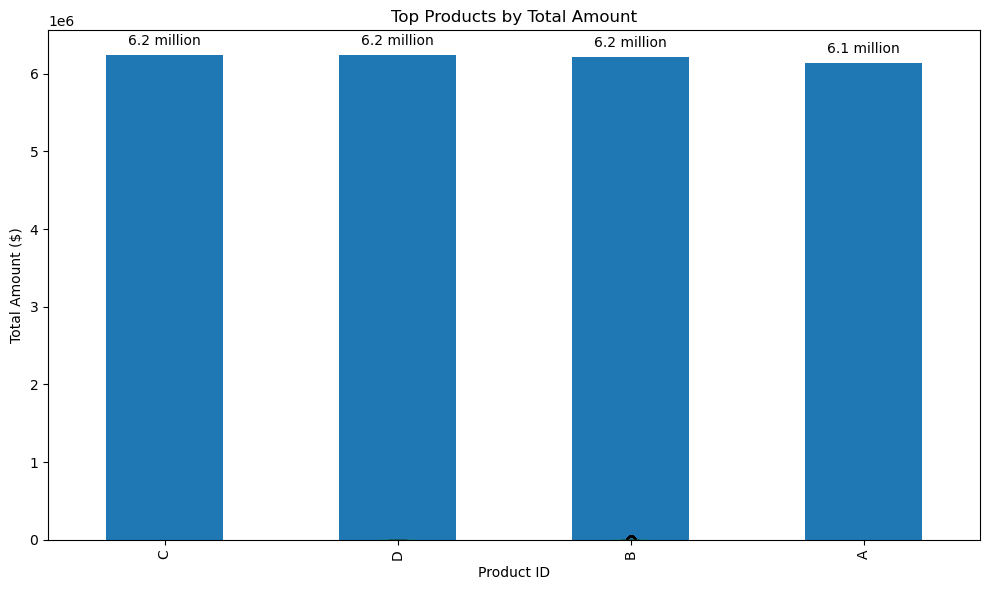

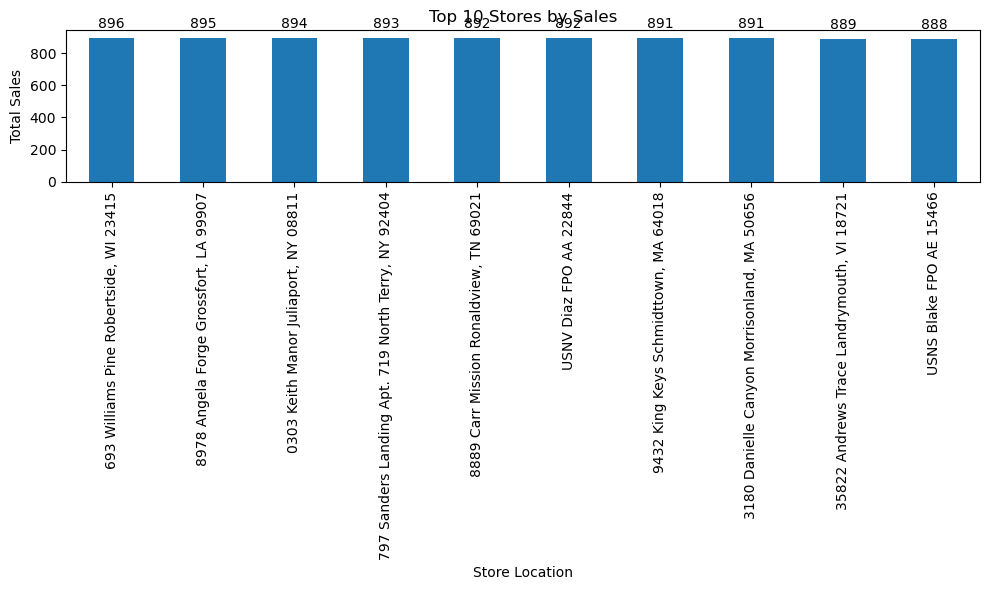

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import random
# Visualization: Top products
ax = top_products.plot(kind='bar', title='Top Products by Total Amount', figsize=(10, 6))
plt.xlabel('Product ID')  # Set x-axis label
plt.ylabel('Total Amount ($)')  # Set y-axis label

# Add values in 'million' format on top of bars
for bar in ax.patches:  # Access each bar in the plot
    height = bar.get_height()  # Get the height of the bar
    ax.annotate(
        f"{height/1e6:.1f} million",  # Format height as millions with 1 decimal
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
        xytext=(0, 5),  # Offset text slightly above the bar
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,  # Font size
        color="black",  # Text color
    )

# Show the plot
plt.tight_layout()
plt.show()


#Top Stores visualization
# Plot the bar chart
ax = top_stores.head(10).plot(kind='bar', title='Top 10 Stores by Sales', figsize=(10, 6))
plt.xlabel('Store Location')
plt.ylabel('Total Sales')

# Add values on top of bars
for bar in ax.patches:  # Access each bar
    height = bar.get_height()  # Get the height of the bar
    ax.annotate(
        f"{height:,.0f}",  # Format as a number with commas
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
        xytext=(0, 5),  # Offset slightly above the bar
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,  # Font size
        color="black",  # Text color
    )

# Show the chart
plt.tight_layout()
plt.show()


In [167]:
# Analyzing customer segmentation
# High spenders
customer_spend = merged_data.groupby('CustomerID')['TotalAmount'].sum()
high_spenders = customer_spend[customer_spend > customer_spend.quantile(0.75)]
print("High Spenders:")
print(high_spenders)

# Frequent buyers
customer_frequency = merged_data['CustomerID'].value_counts()
frequent_buyers = customer_frequency[customer_frequency > customer_frequency.quantile(0.75)]
print("Frequent Buyers:")
print(frequent_buyers)

High Spenders:
CustomerID
42        502.656523
65        548.006625
100       710.062576
169       457.119532
297       520.596806
             ...    
999618    412.078182
999695    504.938750
999766    742.915116
999781    670.232504
999860    465.560130
Name: TotalAmount, Length: 23804, dtype: float64
Frequent Buyers:
340516    4
717286    4
892820    4
397868    3
78182     3
         ..
688271    2
741405    2
908198    2
165864    2
686047    2
Name: CustomerID, Length: 4621, dtype: int64


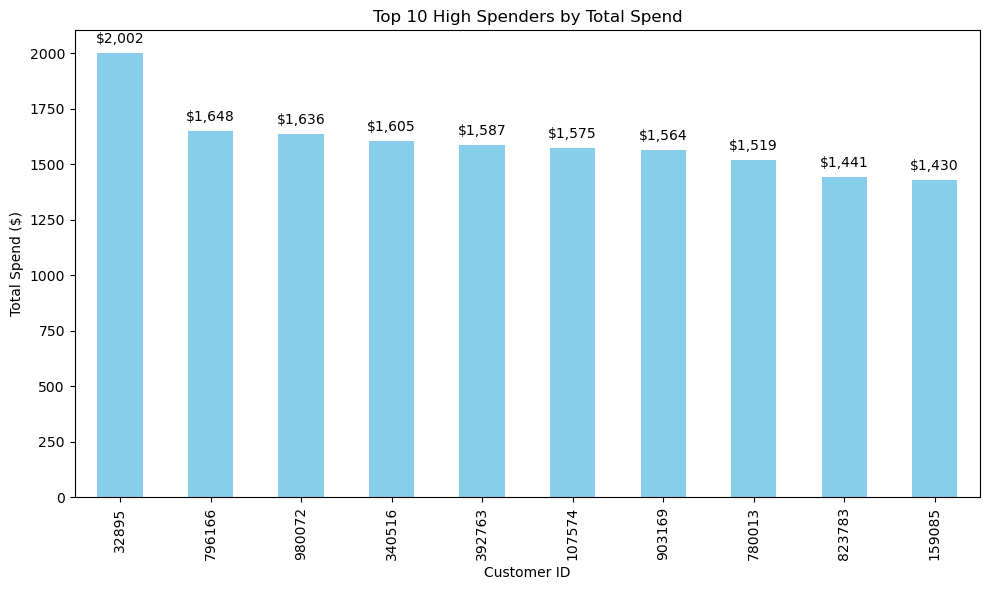

In [168]:
# Getting the top 10 spenders
top_spenders = high_spenders.sort_values(ascending=False).head(10)

# Creating the bar chart
ax = top_spenders.plot(kind='bar', title='Top 10 High Spenders by Total Spend', figsize=(10, 6), color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend ($)')

# Adding the spending amounts above the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"${height:,.0f}",  # Format the amount with a dollar sign and commas
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
        xytext=(0, 5),  # Offset slightly above the bar
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,  # Font size
        color="black",  # Text color
    )

# Displaying the chart
plt.tight_layout()
plt.show()


Top 10 Frequent Buyers (Sorted):
397868    3
78182     3
261307    3
53913     3
819538    3
449431    3
490974    3
340516    4
717286    4
892820    4
Name: CustomerID, dtype: int64


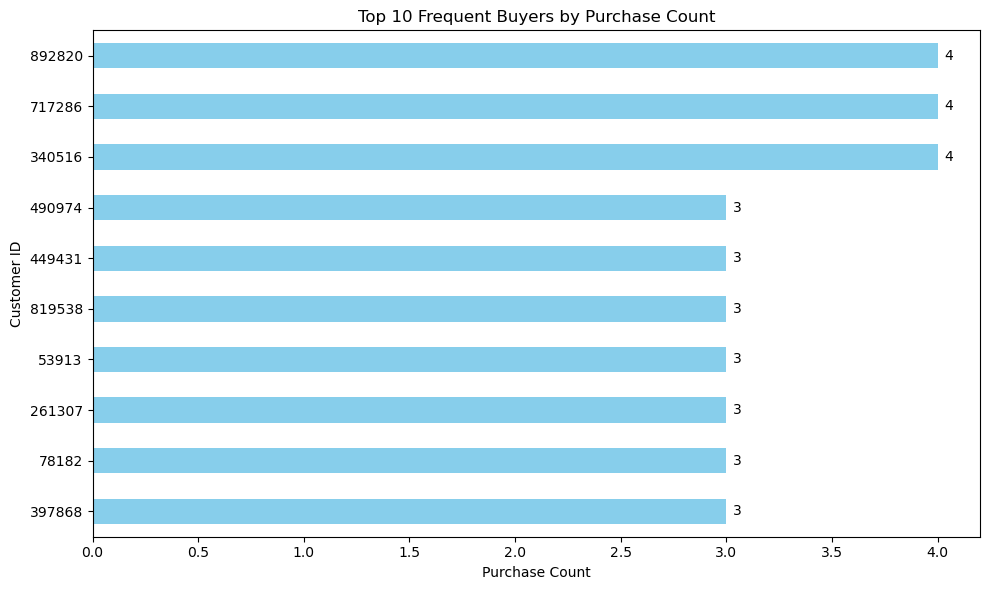

In [169]:
#Visualizing Top 10 frequent buyers
# Calculating the frequency of each customer
customer_frequency = merged_data['CustomerID'].value_counts()

# Getting the top 10 frequent buyers and sort them in descending order
top_frequent_buyers = customer_frequency.head(10).sort_values(ascending=True)

# Print the top 10 frequent buyers
print("Top 10 Frequent Buyers (Sorted):")
print(top_frequent_buyers)

# Plotting the horizontal bar chart
ax = top_frequent_buyers.plot(kind='barh', title='Top 10 Frequent Buyers by Purchase Count', figsize=(10, 6), color='skyblue')
plt.xlabel('Purchase Count')
plt.ylabel('Customer ID')

# Adding purchase counts next to the bars
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(
        f"{int(width)}",  # Display the count as an integer
        xy=(width, bar.get_y() + bar.get_height() / 2),  # Position next to the bar
        xytext=(5, 0),  # Offset slightly to the right of the bar
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=10,  # Font size
        color="black",  # Text color
    )

# Displaying the chart
plt.tight_layout()
plt.show()


In [170]:
# Examining correlations between sales and external factors (e.g., holidays)
correlation = merged_data[['TotalAmount', 'IsHoliday']].corr()
print("Correlation between Sales and Holidays:")
print(correlation)

Correlation between Sales and Holidays:
             TotalAmount  IsHoliday
TotalAmount      1.00000   -0.00359
IsHoliday       -0.00359    1.00000


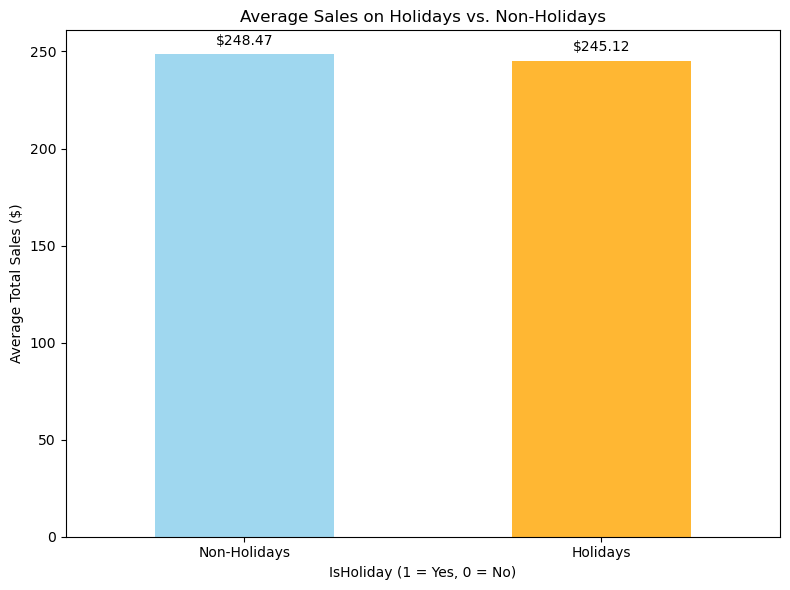

In [171]:
# Calculate average sales for holidays and non-holidays
avg_sales = merged_data.groupby('IsHoliday')['TotalAmount'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
ax = avg_sales.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.xlabel('IsHoliday (1 = Yes, 0 = No)')
plt.ylabel('Average Total Sales ($)')
plt.xticks(ticks=[0, 1], labels=['Non-Holidays', 'Holidays'], rotation=0)

# Add numbers on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"${height:,.2f}",  # Format the number with 2 decimals and a dollar sign
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
        xytext=(0, 5),  # Offset slightly above the bar
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,  # Font size
        color="black",  # Text color
    )

plt.tight_layout()
plt.show()



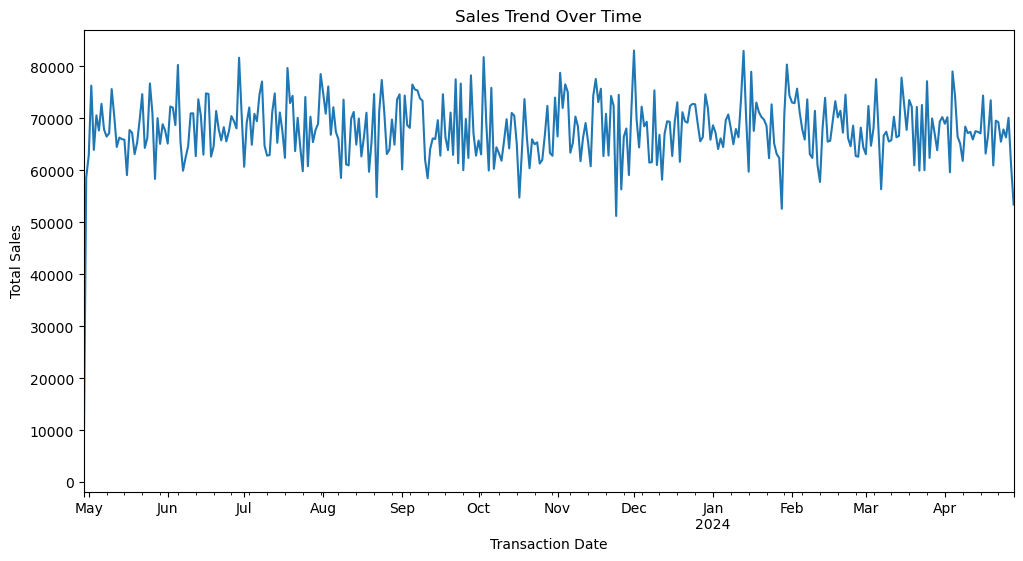

In [172]:
# Visualization: Time series for trends
sales_trend = merged_data.groupby('TransactionDate')['TotalAmount'].sum()
sales_trend.plot(figsize=(12, 6), title='Sales Trend Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.show()

In [173]:
# Geographic heatmaps for store performance
store_sales = merged_data.groupby('StoreLocation')['TotalAmount'].sum().reset_index()
store_sales['Latitude'] = [random.uniform(-90, 90) for _ in range(len(store_sales))]  # Example latitudes
store_sales['Longitude'] = [random.uniform(-180, 180) for _ in range(len(store_sales))]  # Example longitudes

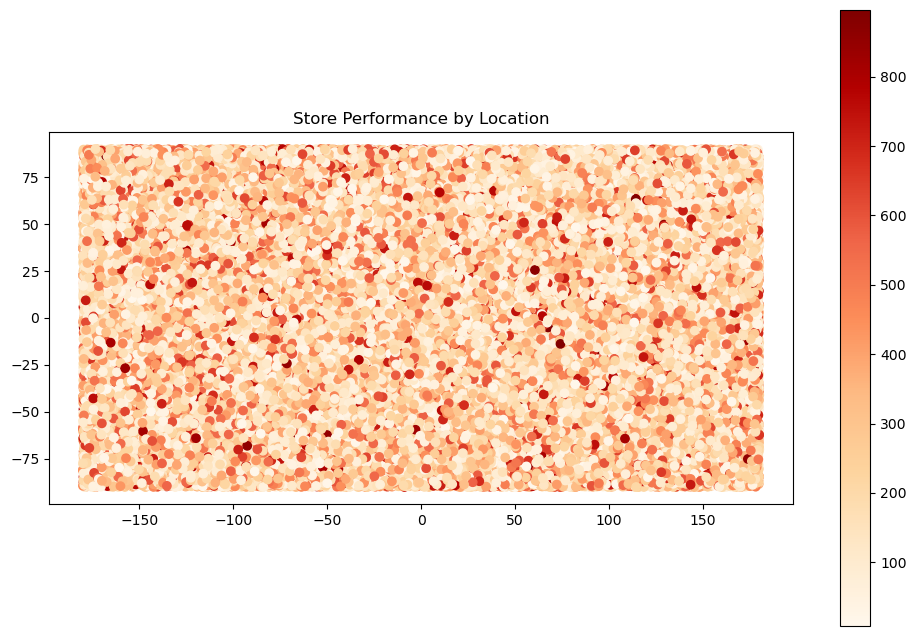

In [174]:
# Converting to GeoDataFrame
gdf = gpd.GeoDataFrame(store_sales, geometry=gpd.points_from_xy(store_sales.Longitude, store_sales.Latitude))
gdf.plot(column='TotalAmount', cmap='OrRd', legend=True, figsize=(12, 8))
plt.title('Store Performance by Location')
plt.show()

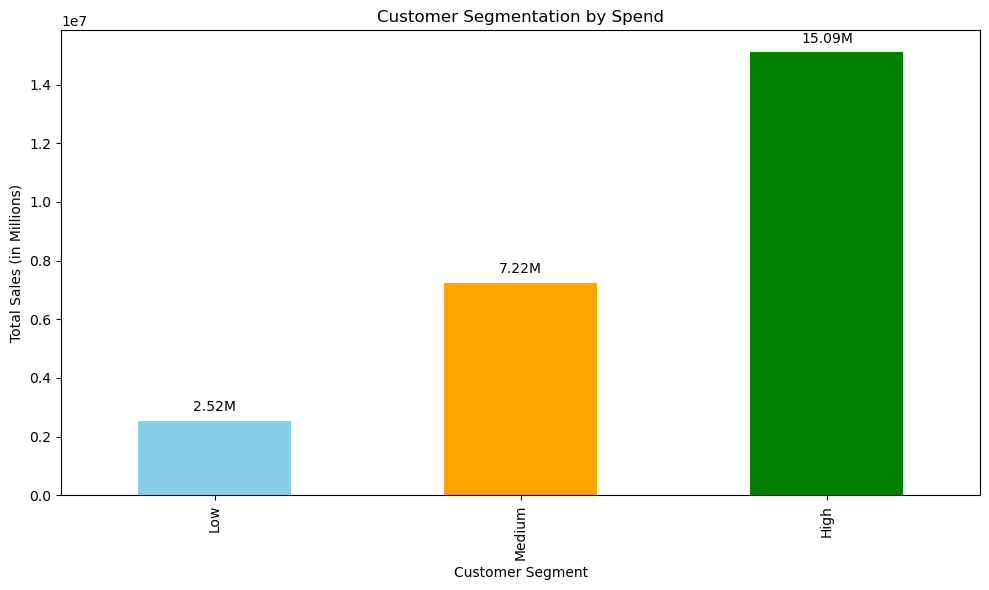

In [175]:
# Clustered bar charts for customer segmentation for low, medium, high spending

merged_data['CustomerSegment'] = pd.qcut(
    merged_data.groupby('CustomerID')['TotalAmount'].transform('sum'),
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Calculate total sales by customer segment
segment_data = merged_data.groupby('CustomerSegment')['TotalAmount'].sum()

# Plot the bar chart
ax = segment_data.plot(kind='bar', title='Customer Segmentation by Spend', figsize=(10, 6), color=['skyblue', 'orange', 'green'])
plt.xlabel('Customer Segment')  # Set x-axis label
plt.ylabel('Total Sales (in Millions)')  # Set y-axis label

# Add values on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height/1e6:.2f}M",  # Format as millions with 2 decimal places
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # Offset slightly above the bar
        textcoords="offset points",
        ha="center", va="bottom",
        fontsize=10
    )

# Show the chart
plt.tight_layout()
plt.show()


# Advanced Analysis

In [176]:
#Checking datatype for columns for correlation
print(merged_data[['Quantity', 'DiscountApplied(%)', 'AvgSpend', 'IsHoliday', 'TotalAmount']].dtypes)


Quantity                int64
DiscountApplied(%)    float64
AvgSpend              float64
IsHoliday                bool
TotalAmount           float64
dtype: object


In [177]:
merged_data['IsHoliday'] = merged_data['IsHoliday'].astype(int)  # converting isholiday column into numeric


Correlation Matrix:
                    TotalAmount  IsHoliday  Quantity  DiscountApplied(%)  \
TotalAmount            1.000000  -0.003590  0.691847           -0.087858   
IsHoliday             -0.003590   1.000000  0.000726            0.001161   
Quantity               0.691847   0.000726  1.000000           -0.003632   
DiscountApplied(%)    -0.087858   0.001161 -0.003632            1.000000   
AvgSpend               0.976120  -0.002902  0.674881           -0.086969   

                    AvgSpend  
TotalAmount         0.976120  
IsHoliday          -0.002902  
Quantity            0.674881  
DiscountApplied(%) -0.086969  
AvgSpend            1.000000  


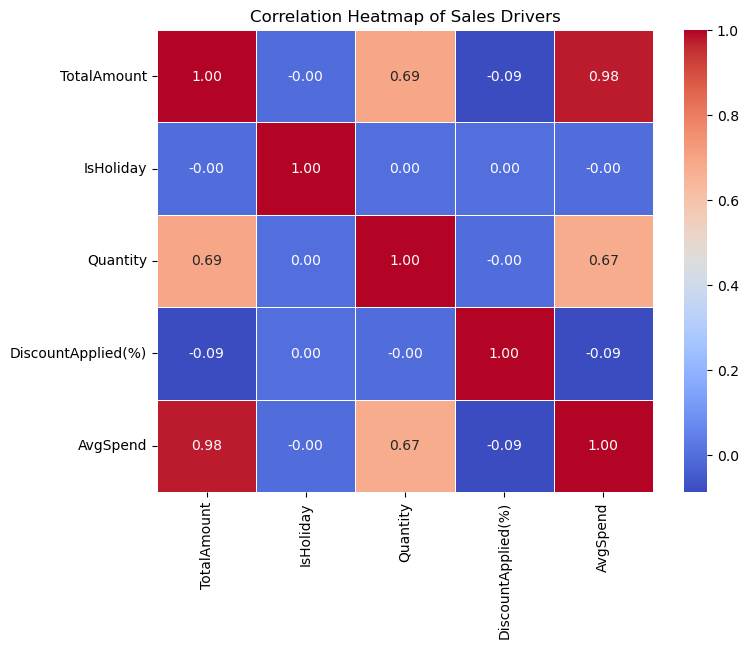

Regression Results:
                            OLS Regression Results                            
Dep. Variable:            TotalAmount   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.288e+05
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:46:24   Log-Likelihood:            -5.0879e+05
No. Observations:              100000   AIC:                         1.018e+06
Df Residuals:                   99995   BIC:                         1.018e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [178]:
import seaborn as sns
import statsmodels.api as sm

# Correlation analysis
correlation_matrix = merged_data[['TotalAmount', 'IsHoliday', 'Quantity', 'DiscountApplied(%)', 'AvgSpend']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Sales Drivers")
plt.show()

# Regression analysis: TotalAmount as the dependent variable
X = merged_data[['Quantity', 'DiscountApplied(%)', 'AvgSpend', 'IsHoliday']]
y = merged_data['TotalAmount']

# Add constant for regression
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()
print("Regression Results:")
print(model.summary())

Customer Segments:
            CustomerID  TotalAmount   Quantity  TotalTransactions    AvgSpend
Cluster                                                                      
0        500157.503478   133.833233   3.756814           1.000000  133.833233
1        499501.362808   454.640797   7.268391           1.000000  454.640797
2        505066.458992   503.230718  10.154728           4.178749  247.164671


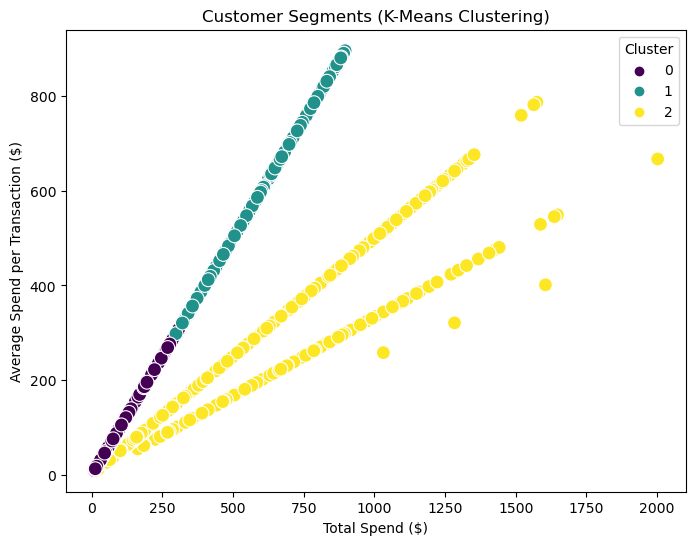

In [179]:
#K-means clustering for customer segmentation 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_data = merged_data.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'TotalTransactions': 'sum',
    'AvgSpend': 'mean'
}).reset_index()

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data[['TotalAmount', 'Quantity', 'TotalTransactions', 'AvgSpend']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(normalized_data)

# Analyze clusters
print("Customer Segments:")
print(clustering_data.groupby('Cluster').mean())

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data['TotalAmount'], 
    y=clustering_data['AvgSpend'], 
    hue=clustering_data['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Total Spend ($)")
plt.ylabel("Average Spend per Transaction ($)")
plt.legend(title='Cluster')
plt.show()


Bottom 10% Performing Stores:
StoreLocation
000 Cooper Canyon Apt. 636 Roberttown, LA 41660           40.619301
0000 Lopez Stream Suite 663 South Johnnystad, SC 83484    46.877385
00004 Roberts Cliffs Suite 124 Deanmouth, TX 06926        32.415707
0002 Emily Drive Briannashire, WY 06976                   47.837789
00030 Mary Cliff South Wesleyborough, PR 12564            50.534285
                                                            ...    
Unit 9805 Box 5519 DPO AA 69996                           42.197981
Unit 9807 Box 9375 DPO AA 97605                           15.255378
Unit 9856 Box 3692 DPO AP 93352                           36.220185
Unit 9891 Box 6140 DPO AP 49020                           41.626240
Unit 9926 Box 4955 DPO AA 74420                           28.190827
Name: TotalAmount, Length: 10000, dtype: float64
Bottom 10% Performing Products:
ProductID
A    6.138792e+06
Name: TotalAmount, dtype: float64


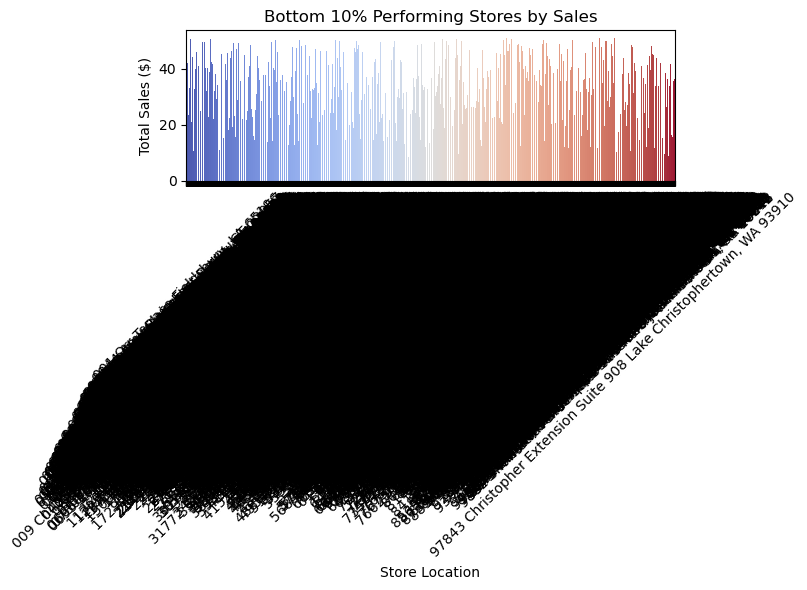

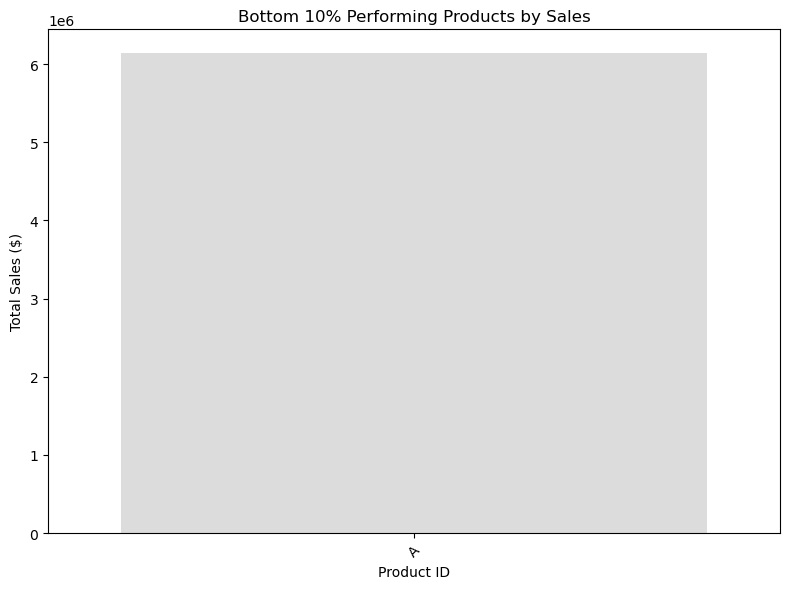

In [180]:
# Identify low-performing stores (e.g., bottom 10% by total sales)
low_performing_stores = merged_data.groupby('StoreLocation')['TotalAmount'].sum()
threshold = low_performing_stores.quantile(0.10)  # Change to 10% quantile
low_performing_stores = low_performing_stores[low_performing_stores <= threshold]
print("Bottom 10% Performing Stores:")
print(low_performing_stores)

# Identify low-performing products (e.g., bottom 10% by total sales)
low_performing_products = merged_data.groupby('ProductID')['TotalAmount'].sum()
threshold = low_performing_products.quantile(0.10)  # Change to 10% quantile
low_performing_products = low_performing_products[low_performing_products <= threshold]
print("Bottom 10% Performing Products:")
print(low_performing_products)

# Analyze common patterns in low-performing stores
low_store_analysis = merged_data[merged_data['StoreLocation'].isin(low_performing_stores.index)]

# Analyze common patterns in low-performing products
low_product_analysis = merged_data[merged_data['ProductID'].isin(low_performing_products.index)]

# Plot low-performing stores
plt.figure(figsize=(8, 6))
sns.barplot(x=low_performing_stores.index, y=low_performing_stores.values, palette='coolwarm')
plt.title("Bottom 10% Performing Stores by Sales")
plt.xlabel("Store Location")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot low-performing products
plt.figure(figsize=(8, 6))
sns.barplot(x=low_performing_products.index, y=low_performing_products.values, palette='coolwarm')
plt.title("Bottom 10% Performing Products by Sales")
plt.xlabel("Product ID")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


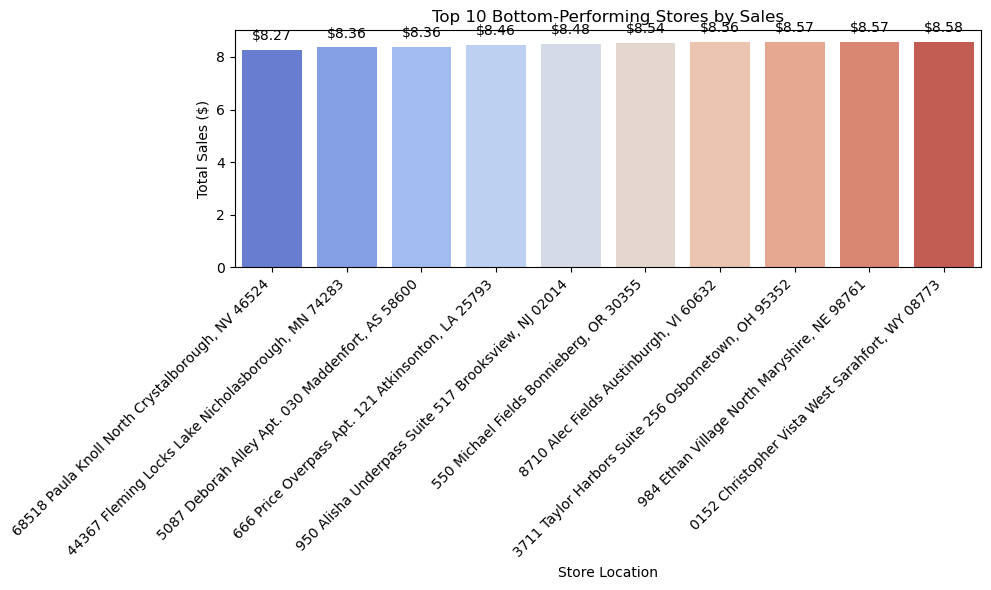

In [181]:
# Focusing on the top 10 lowest-performing stores
top_low_performing_stores = low_performing_stores.nsmallest(10)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_low_performing_stores.index, y=top_low_performing_stores.values, palette='coolwarm')
plt.title("Top 10 Bottom-Performing Stores by Sales")
plt.xlabel("Store Location")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha="right")  # Rotate for readability

# Add numbers on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"${height:,.2f}",  # Format the number with commas and 2 decimal places
        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
        xytext=(0, 5),  # Offset slightly above the bar
        textcoords="offset points",
        ha="center", va="bottom",
        fontsize=10  # Font size for the annotation
    )

plt.tight_layout()
plt.show()



# Reporting and Visualization


In [130]:
#installing dash library
!pip install dash dash-bootstrap-components


     ---------------------------------------- 7.8/7.8 MB 16.1 MB/s eta 0:00:00
     -------------------------------------- 229.3/229.3 kB 7.1 MB/s eta 0:00:00


In [182]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Sample dataset (replace with your own dataset)
df = merged_data.copy()

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=["https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css"])

# Layout of the Dashboard
app.layout = html.Div([
    html.H1("Retail Sales Dashboard", style={"textAlign": "center"}),

    # Filters Section
    html.Div([
        html.Label("Filter by Store:"),
        dcc.Dropdown(
            id="store-filter",
            options=[{"label": store, "value": store} for store in df["StoreLocation"].unique()],
            multi=True
        ),
        html.Label("Filter by Product Category:"),
        dcc.Dropdown(
            id="category-filter",
            options=[{"label": cat, "value": cat} for cat in df["ProductCategory"].unique()],
            multi=True
        ),
        html.Label("Filter by State:"),
        dcc.Dropdown(
            id="state-filter",
            options=[{"label": state, "value": state} for state in df["State"].unique()],
            multi=True
        ),
    ], style={"padding": "10px"}),

    # Sales Trends Section
    html.Div([
        html.H2("Sales Trends"),
        dcc.Graph(id="sales-trend-chart"),
    ]),

    # Customer Insights Section
    html.Div([
        html.H2("Customer Insights"),
        dcc.Graph(id="demographic-distribution"),
        dcc.Graph(id="spending-patterns"),
    ]),

    # Store Performance Section
    html.Div([
        html.H2("Store Performance"),
        dcc.Graph(id="state-wise-bar-chart"),
        dcc.Graph(id="state-wise-choropleth"),
    ]),

    # External Factors Section
    html.Div([
        html.H2("Impact of External Factors"),
        dcc.Graph(id="correlation-analysis"),
    ]),
])

# Callback for Sales Trends
@app.callback(
    Output("sales-trend-chart", "figure"),
    [Input("store-filter", "value"),
     Input("category-filter", "value"),
     Input("state-filter", "value")]
)
def update_sales_trend(store, category, state):
    filtered_data = df.copy()
    if store:
        filtered_data = filtered_data[filtered_data["StoreLocation"].isin(store)]
    if category:
        filtered_data = filtered_data[filtered_data["ProductCategory"].isin(category)]
    if state:
        filtered_data = filtered_data[filtered_data["State"].isin(state)]
    sales_trend = filtered_data.groupby("TransactionDate")["TotalAmount"].sum().reset_index()
    fig = px.line(sales_trend, x="TransactionDate", y="TotalAmount", title="Sales Trends Over Time")
    return fig

# Callback for Demographic Distribution
@app.callback(
    Output("demographic-distribution", "figure"),
    [Input("store-filter", "value")]
)
def update_demographic_distribution(store):
    filtered_data = df.copy()
    if store:
        filtered_data = filtered_data[filtered_data["StoreLocation"].isin(store)]
    demographic_data = filtered_data["CustomerSegment"].value_counts().reset_index()
    fig = px.pie(demographic_data, names="index", values="CustomerSegment", title="Demographic Distribution")
    return fig

# Callback for Spending Patterns
@app.callback(
    Output("spending-patterns", "figure"),
    [Input("store-filter", "value")]
)
def update_spending_patterns(store):
    filtered_data = df.copy()
    if store:
        filtered_data = filtered_data[filtered_data["StoreLocation"].isin(store)]
    spending_data = filtered_data.groupby("CustomerSegment")["TotalAmount"].sum().reset_index()
    fig = px.bar(spending_data, x="CustomerSegment", y="TotalAmount", title="Spending Patterns by Segment")
    return fig

# Callback for State-Wise Bar Chart
@app.callback(
    Output("state-wise-bar-chart", "figure"),
    [Input("state-filter", "value")]
)
def update_state_bar_chart(state):
    filtered_data = df.copy()
    if state:
        filtered_data = filtered_data[filtered_data["State"].isin(state)]
    state_sales = filtered_data.groupby("State")["TotalAmount"].sum().reset_index()
    fig = px.bar(state_sales, x="State", y="TotalAmount", title="State-Wise Total Sales", color="TotalAmount")
    return fig

# Callback for State-Wise Choropleth Map
@app.callback(
    Output("state-wise-choropleth", "figure"),
    [Input("state-filter", "value")]
)
def update_state_choropleth(state):
    filtered_data = df.copy()
    if state:
        filtered_data = filtered_data[filtered_data["State"].isin(state)]
    state_sales = filtered_data.groupby("State")["TotalAmount"].sum().reset_index()
    fig = px.choropleth(
        state_sales,
        locations="State",
        locationmode="USA-states",  # Abbreviations required
        color="TotalAmount",
        color_continuous_scale="Viridis",
        title="State-Wise Sales Performance",
        scope="usa"
    )
    return fig

# Callback for Correlation Analysis
@app.callback(
    Output("correlation-analysis", "figure"),
    [Input("store-filter", "value")]
)
def update_correlation_analysis(store):
    filtered_data = df.copy()
    if store:
        filtered_data = filtered_data[filtered_data["StoreLocation"].isin(store)]
    correlation_data = filtered_data[["TotalAmount", "IsHoliday"]].corr()
    fig = px.imshow(correlation_data, text_auto=True, title="Correlation Between Holidays and Sales")
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)
